## Visualize the trend of Enrollments in U.S over the 1990 to 2016 in different education level

Import libraries and define generic functions

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_graph(x, y, style, xlabel, ylabel, title, label='', legend=None, pointlabel=False):
    plt.plot(x, y, style, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if legend:
      plt.legend()
    
    if pointlabel:
        for a,b in zip(x[::5], y[::5]):
            plt.text(a+0.2, b-0.5, str(b))


### Load data from CSV downloaded from  [NCES](https://nces.ed.gov/programs/digest/d18/tables/dt18_105.30.asp)


In [17]:
data = pd.read_csv('data/NCES_Enrollment_Data.csv', dtype={'Year':np.str, 'Total Enrollment':np.int32,
       'Elementary & Secondary enrollment':np.int32,
       'Public elementary and secondary':np.int32,
       'Private elementary and secondary schools':np.int32,
       'Degree-granting postsecondary institutions Total':np.int32,
       'Public post graduation colleges':np.int32, 'Private post graduation colleges':np.int32}, thousands=',')


#### Clean data

Clean 'Year' column as following for example

    1869-70 => 1869
    Fall 1959 => 1959

    And conver year column in integer


In [19]:
data['Year'] = data['Year'].replace(regex=r'(Fall )()', value='')
data['Year'] = data['Year'].replace(regex=r'()(-)(\d{2})*', value='')
data['Year'] = pd.to_numeric(data['Year'])


### Show total enrollment data from 1990-2016

We are normalizing the values by dividing all values by its average over the years to compare the trends over different types of education.

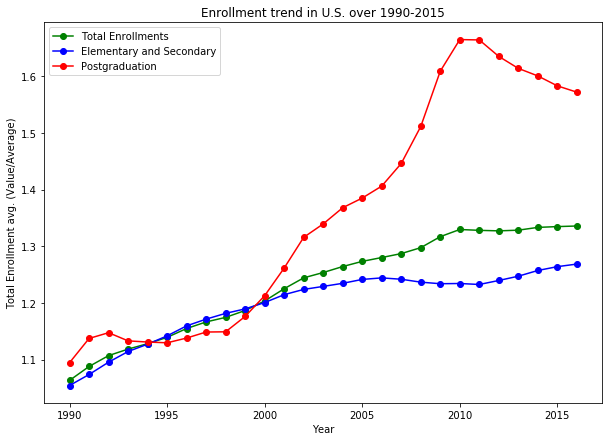

In [20]:
x = data['Year'][12:].values
y = data['Total Enrollment'][12:].div(data['Total Enrollment'].mean()).values
y1 = data['Elementary & Secondary enrollment'][12:].div(data['Elementary & Secondary enrollment'].mean()).values
y2 = data['Degree-granting postsecondary institutions Total'][12:].div(data['Degree-granting postsecondary institutions Total'].mean()).values

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y, '-og', "Year", "Total Enrollment avg.", "Enrollment trend in U.S.",label="Total Enrollments")
# plt.show()
# fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y1, '-ob', "Year", "Total Enrollment avg.", "Enrollment trend in U.S.", label="Elementary and Secondary")
# plt.show()
# fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y2, '-or', "Year", "Total Enrollment avg. (Value/Average)", "Enrollment trend in U.S. over 1990-2015", label="Postgraduation", legend=True)
plt.show()


### Comapre enrollment growth over the years between postgraduation and secodary graduation


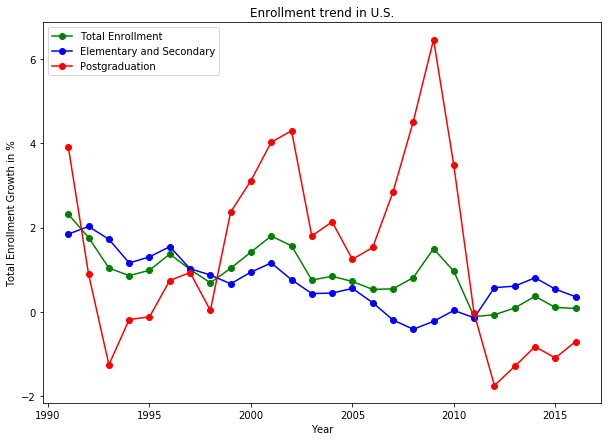

In [21]:
x = data['Year'][13:].values
y = data['Total Enrollment'].pct_change()[13:].mul(100).values
y1 = data['Elementary & Secondary enrollment'].pct_change()[13:].mul(100).values
y2 = data['Degree-granting postsecondary institutions Total'].pct_change()[13:].mul(100).values

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y, '-og', "Year", "Total Enrollment Growth in %", "Enrollment trend in U.S.", label='Total Enrollment')
plot_graph(x, y1, '-ob', "Year", "Total Enrollment Growth in %", "Enrollment trend in U.S.",
          label="Elementary and Secondary")
plot_graph(x, y2, '-or', "Year", "Total Enrollment Growth in %", "Enrollment trend in U.S.",
          label="Postgraduation", legend=True)

plt.show()


## Graudate program fees over a period

As shown in graph below, the growth rate of graduate program fees over a time is even higher than growth percentage rate of inflation in U.S

In [26]:
data = pd.read_csv('data/NCES_graduate_fees.csv').apply(pd.to_numeric)
print(data.head(5))

inflation = pd.read_csv('data/inflation_rate.csv')
print(inflation.head(5))

   Year  Total  Public Institutions  Private Institutions   PI Profit  \
0  1999   8069                 4042                 13821       14123   
1  2000   8429                 4243                 14420       14457   
2  2001   8857                 4496                 15165       15232   
3  2002   9226                 4842                 14983       15676   
4  2003  10312                 5544                 16209       16807   

    PI Non-profit   PB 25Percentile   PB Median   PB 75Percentile  \
0            9611              2640        3637              5163   
1           13229              2931        3822              5347   
2           13414              3226        4119              5596   
3            9644              3395        4452              5927   
4           12542              3795        5103              7063   

    NP 25Percentile   NP Median   NP 75Percentile  
0              7998       12870             20487  
1              8276       13200           

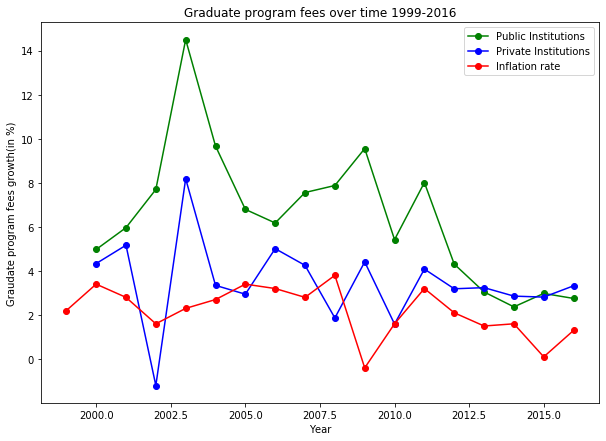

In [24]:
x = data['Year'].values
y = data['Public Institutions'].pct_change().mul(100).values
y1 = data['Private Institutions'].pct_change().mul(100).values
y2 = inflation['Inflation'].values  # Already percentage value

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y, '-og', "Year", "Graudate program fees growth(in %)", "Graduate program fees over time 1999-2016", label='Public Institutions')
plot_graph(x, y1, '-ob', "Year", "Graudate program fees growth(in %)", "Graduate program fees over time 1999-2016", label='Private Institutions')
plot_graph(x, y2, '-or', "Year", "Graudate program fees growth(in %)", "Graduate program fees over time 1999-2016", label='Inflation rate')
plt.legend()


## The education loan by students over a time for higher education in U.S
